In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew
from scipy.stats import kurtosistest 
from scipy import stats 
import statsmodels.api as sm


In [2]:
df = pd.read_csv('../datos/possum_limpio.csv', index_col=0)

In [4]:
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


Vamos a evaluar la normalidad de nuestra variable respuesta. Para ello haremos una serie de tests: asimetría, curtosis, Shapiro test, análisis gráfico(visual). Para este estudio hemos considerado un nivel de significancia de 0.05 según convención. 

- H0: nuestra distribución es normal
- H1: nuestra distribución no es normal


### 1. Qué diferencia existe el error de tipo I y el error de tipo II?

Cometeremos **error de Tipo I** si rechazamos la hipótesis nula cuando es verdadera

Cometemos **error de Tipo II** cuando la hipótesis nula es falsa y no la rechaza 

A tener en cuenta: p-valor y potencia de la prueba


### 2. ¿Qué es la asimetría?

Al evaluar asimetría tenemos 3 posibles resultados:

- distribuciones asimétricas positivas
- distribuciones asimétricas negativas
- distribuciones simétricas

En Python usaremos: from scipy.stats import skew

- si valor = 0 --> datos simétricos, distribución normal.
- si valor > 0 --> datos asimétricos positivos
- si valor < 0 --> datos asimétricos negativos. 

### 3. ¿Es vuestra variable respuesta asimétrica?

In [5]:
df["totlngth"].skew() 

-0.285265771534222

Sí, nuestra distribución es asimétrica negativa. 

### 4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [7]:
kurtosistest(df['totlngth'])

KurtosistestResult(statistic=-0.06048655890128592, pvalue=0.951768120691866)

 El tipo de curtosis es Leptocurtosis, esto también lo veremos a continuación en el gráfico. 
 
 `Leptocurtosis`: cuando el valor de la  curtosis es mayor que 0.

### 5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

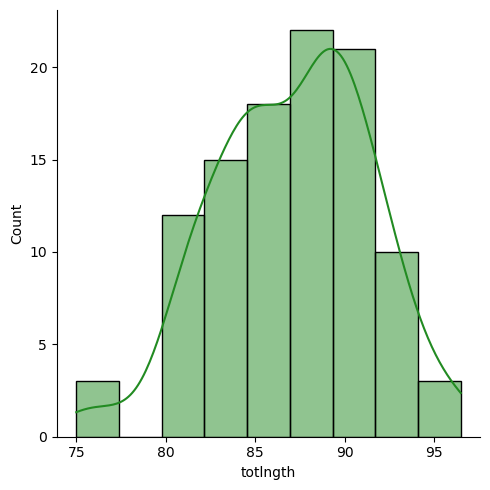

In [22]:
# Representación visual mediante histgograma

sns.displot(df['totlngth'], kde = True, color = "forestgreen");

En este histograma, podemos observar la forma de campana de Gauss de nuestra distribución. Visualmente, podríamos decir que nuestra distribución es normal. 

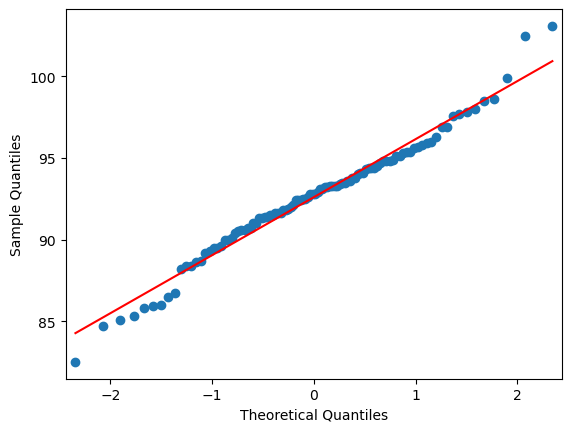

In [33]:
# Representación visual mediante QQ-plot

sm.qqplot(df['hdlngth'], line= 's');

En este QQ-Plot, podemos ver como los puntos de mi muestra se ajustan a la línea que representa una muestra con nuestra media y desviación estándar si tuviera una distribución normal. Como los puntos en su mayoría coinciden con la recta, se infiere que se trata de una distribución normal. 

In [10]:
# Hacemos el Test de Shapiro para evaluar la normalidad de forma analítica

stats.shapiro(df["totlngth"])


ShapiroResult(statistic=0.9839882850646973, pvalue=0.24401579797267914)

Según el Test de Shapiro, nuestra variable respuesta es normal. El p-valor es mayor a 0.05, por lo tanto, no rechazo mi H0, lo cual quiere decir que tenemos una distribución normal. 

### Conclusión

No rechazamos nuestra H0: según los análisis que hemos hecho, la distribución de nuestra variable respuesta es normal. 